In [1]:
import numpy as np
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration
import deconv as d
import graphics as g
import metrics as m

astro = color.rgb2gray(data.astronaut())

np.random.seed(seed=0)

psf = np.ones((5, 5)) / 25
astro_blurred = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro_blurred.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

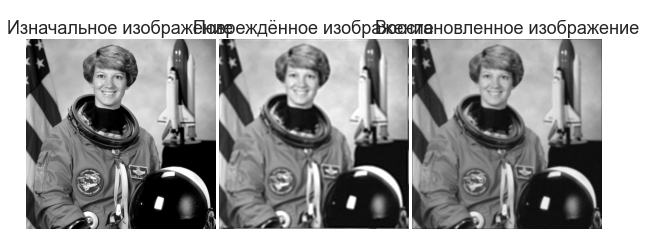

In [2]:
tykh = d.tykhonov(astro_noisy, psf)
tykh.optimize(astro, m.MAE, n = 50)
g.plot3imgs(astro, tykh.recover_image(), astro_noisy, suptitle=' ', figsize=(8, 5))

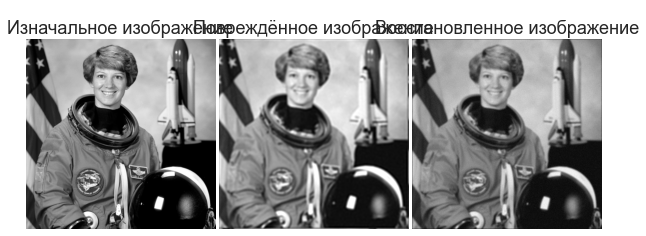

In [3]:
tykh = d.tykhonov(astro_noisy, psf)
tykh.optimize(astro, m.MAE, n = 100)
g.plot3imgs(astro, tykh.recover_image(), astro_noisy, suptitle=' ', figsize=(8, 5))

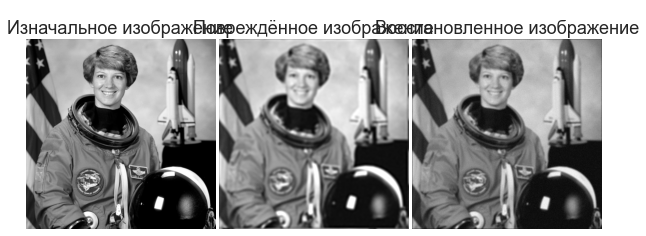

In [4]:
tykh = d.tykhonov(astro_noisy, psf)
tykh.optimize(astro, m.MAE, n = 200)
g.plot3imgs(astro, tykh.recover_image(), astro_noisy, suptitle=' ', figsize=(8, 5))

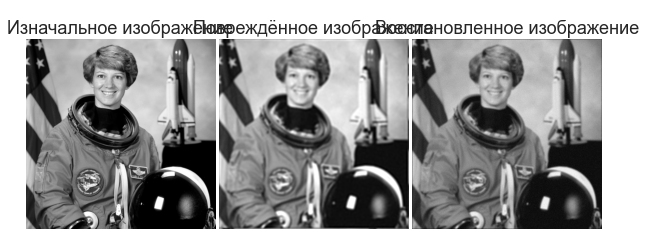

In [5]:
tykh = d.tykhonov(astro_noisy, psf)
tykh.optimize(astro, m.ssim)
g.plot3imgs(astro, tykh.recover_image(), astro_noisy, suptitle=' ', figsize=(8, 5))

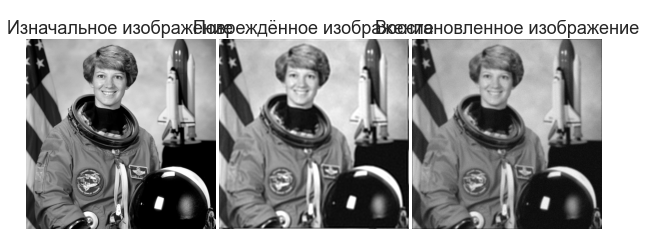

In [6]:
tykh = d.tykhonov(astro_noisy, psf)
tykh.optimize(astro, m.ssim, n = 100)
g.plot3imgs(astro, tykh.recover_image(), astro_noisy, suptitle=' ', figsize=(8, 5))

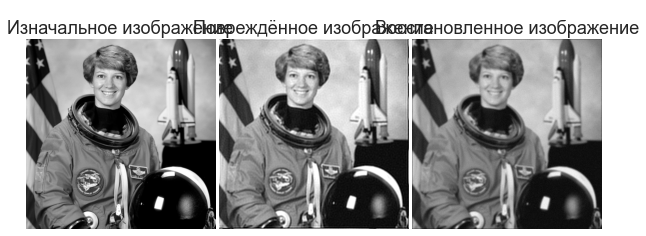

In [7]:
tykh = d.tykhonov(astro_noisy, psf)
g.plot3imgs(astro, tykh.recover_image(gamma = 0.01), astro_noisy, suptitle=' ', figsize=(8, 5))